<a href="https://colab.research.google.com/github/murtajizshah100351-a11y/IMDb-Sentiment-Analysis/blob/main/IMDb_Movies_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CELL 1: Setup and Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted")

import subprocess
import sys

packages_to_install = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'tensorflow', 'nltk']

print("Installing packages...")
for package in packages_to_install:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

print("✓ All packages installed\n")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")


Mounted at /content/drive
✓ Google Drive mounted
Installing packages...
✓ All packages installed

✓ All libraries imported successfully


CELL 2: Extract and Load Dataset from Google Drive

In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/IMDB_Dataset.csv.zip'

print("Extracting dataset...")
extract_path = '/content/IMDb_dataset'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✓ Dataset extracted")

csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
print(f"Found CSV files: {csv_files}")

csv_file = os.path.join(extract_path, csv_files[0])
print(f"\nLoading dataset from: {csv_file}")
df = pd.read_csv(csv_file)

print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print(f"\nPositive Reviews: {(df['sentiment'] == 'positive').sum()}")
print(f"Negative Reviews: {(df['sentiment'] == 'negative').sum()}")
print("\n✓ Dataset loaded successfully")


Extracting dataset...
✓ Dataset extracted
Found CSV files: ['IMDB Dataset.csv']

Loading dataset from: /content/IMDb_dataset/IMDB Dataset.csv

DATASET INFORMATION
Dataset Shape: (50000, 2)
Columns: ['review', 'sentiment']

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Sentiment Distribution:
sentiment
positive    25000
negati

CELL 3: Data Preprocessing

In [4]:
import re
import nltk
from nltk.corpus import stopwords

print("Downloading NLTK resources...")
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub('\s+', ' ', text).strip()
    return text

print("Cleaning text (this may take 1-2 minutes)...")
df['review_cleaned'] = df['review'].apply(clean_text)

df['sentiment_binary'] = (df['sentiment'] == 'positive').astype(int)

print("✓ Data preprocessing complete")
print("\nSample original review:")
print(df['review'].iloc[0][:200])
print("\nSample cleaned review:")
print(df['review_cleaned'].iloc[0][:200])
print("\nSentiment:", "POSITIVE" if df['sentiment_binary'].iloc[0] == 1 else "NEGATIVE")


Cleaning text (this may take 1-2 minutes)...
✓ Data preprocessing complete

Sample original review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo

Sample cleaned review:
one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its br

Sentiment: POSITIVE


CELL 4: Train-Test Split and TF-IDF Vectorization

In [5]:
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    df['review_cleaned'],
    df['sentiment_binary'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_binary']
)

print(f"✓ Data split complete")
print(f"  Training set size: {len(X_train)}")
print(f"  Test set size: {len(X_test)}")
print(f"  Training positive samples: {y_train.sum()}")
print(f"  Training negative samples: {len(y_train) - y_train.sum()}")

print("\nVectorizing text to TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"✓ TF-IDF vectorization complete")
print(f"  Feature matrix shape: {X_train_tfidf.shape}")
print(f"  Number of features: {len(vectorizer.get_feature_names_out())}")


Splitting data into train and test sets...
✓ Data split complete
  Training set size: 40000
  Test set size: 10000
  Training positive samples: 20000
  Training negative samples: 20000

Vectorizing text to TF-IDF...
✓ TF-IDF vectorization complete
  Feature matrix shape: (40000, 5000)
  Number of features: 5000


CELL 5: TF-IDF Vectors Visualization (2D)

TF-IDF VECTORS VISUALIZATION (2D)

Reducing TF-IDF vectors to 2D using PCA...
✓ PCA complete
  Explained variance: 0.0194

✓ TF-IDF visualization saved to Google Drive


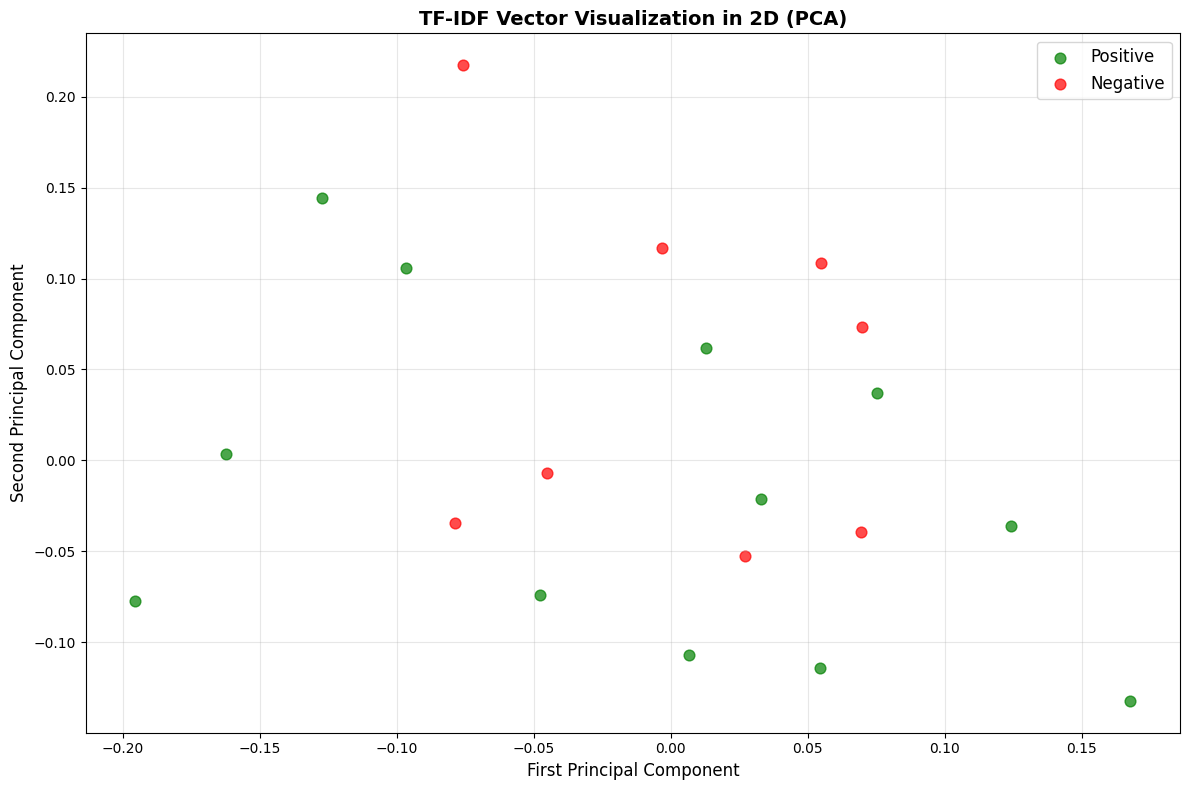

In [7]:
print("="*70)
print("TF-IDF VECTORS VISUALIZATION (2D)")
print("="*70)

# Use PCA to reduce TF-IDF vectors to 2D
print("\nReducing TF-IDF vectors to 2D using PCA...")
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_tfidf.toarray())

print(f"✓ PCA complete")
print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

# Sample 20 points for visualization
sample_size = 20
sample_indices = np.random.choice(len(X_train_2d), size=min(sample_size, len(X_train_2d)), replace=False)
X_sample = X_train_2d[sample_indices]
y_sample = y_train.iloc[sample_indices].values

# Plot positive and negative reviews
positive_mask = y_sample == 1
negative_mask = y_sample == 0

ax.scatter(X_sample[positive_mask, 0], X_sample[positive_mask, 1],
           c='green', label='Positive', alpha=0.7, s=60)
ax.scatter(X_sample[negative_mask, 0], X_sample[negative_mask, 1],
           c='red', label='Negative', alpha=0.7, s=60)

ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
ax.set_title('TF-IDF Vector Visualization in 2D (PCA)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/tfidf_2d_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ TF-IDF visualization saved to Google Drive")
plt.show()


CELL 6: Train Baseline Models (Paper Implementation)

In [8]:
import time

print("="*70)
print("TRAINING BASELINE MODELS (PAPER IMPLEMENTATION)")
print("="*70)

# Model 1: Logistic Regression
print("\n1. Training Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_time = time.time() - start_time
print(f"   ✓ Logistic Regression trained in {lr_time:.2f}s")

# Model 2: Decision Tree (AS IN PAPER)
print("\n2. Training Decision Tree...")
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)
dt_time = time.time() - start_time
print(f"   ✓ Decision Tree trained in {dt_time:.2f}s")

# Model 3: Random Forest
print("\n3. Training Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_time = time.time() - start_time
print(f"   ✓ Random Forest trained in {rf_time:.2f}s")

print("\n✓ All baseline models trained successfully")


TRAINING BASELINE MODELS (PAPER IMPLEMENTATION)

1. Training Logistic Regression...
   ✓ Logistic Regression trained in 6.64s

2. Training Decision Tree...
   ✓ Decision Tree trained in 112.14s

3. Training Random Forest...
   ✓ Random Forest trained in 177.35s

✓ All baseline models trained successfully


CELL 7: Evaluate Baseline Models

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

print("="*70)
print("BASELINE MODEL EVALUATION RESULTS")
print("="*70)

results = []
results.append(evaluate_model(y_test, lr_pred, "Logistic Regression"))
results.append(evaluate_model(y_test, dt_pred, "Decision Tree"))
results.append(evaluate_model(y_test, rf_pred, "Random Forest"))

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("SUMMARY TABLE:")
print("="*70)
print(results_df.to_string(index=False))

best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']
print(f"\n✓ Best Baseline Model: {best_model_name}")
print(f"  Accuracy: {best_accuracy:.4f}")


BASELINE MODEL EVALUATION RESULTS

Logistic Regression:
  Accuracy:  0.8923
  Precision: 0.8880
  Recall:    0.8978
  F1-Score:  0.8929

Decision Tree:
  Accuracy:  0.7134
  Precision: 0.7125
  Recall:    0.7154
  F1-Score:  0.7140

Random Forest:
  Accuracy:  0.8503
  Precision: 0.8583
  Recall:    0.8392
  F1-Score:  0.8486

SUMMARY TABLE:
              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8923   0.888032  0.8978  0.892889
      Decision Tree    0.7134   0.712550  0.7154  0.713972
      Random Forest    0.8503   0.858253  0.8392  0.848620

✓ Best Baseline Model: Logistic Regression
  Accuracy: 0.8923


CELL 8: Bar Charts of Model Performance Metrics

BAR CHARTS OF MODEL PERFORMANCE METRICS
✓ Bar charts saved to Google Drive


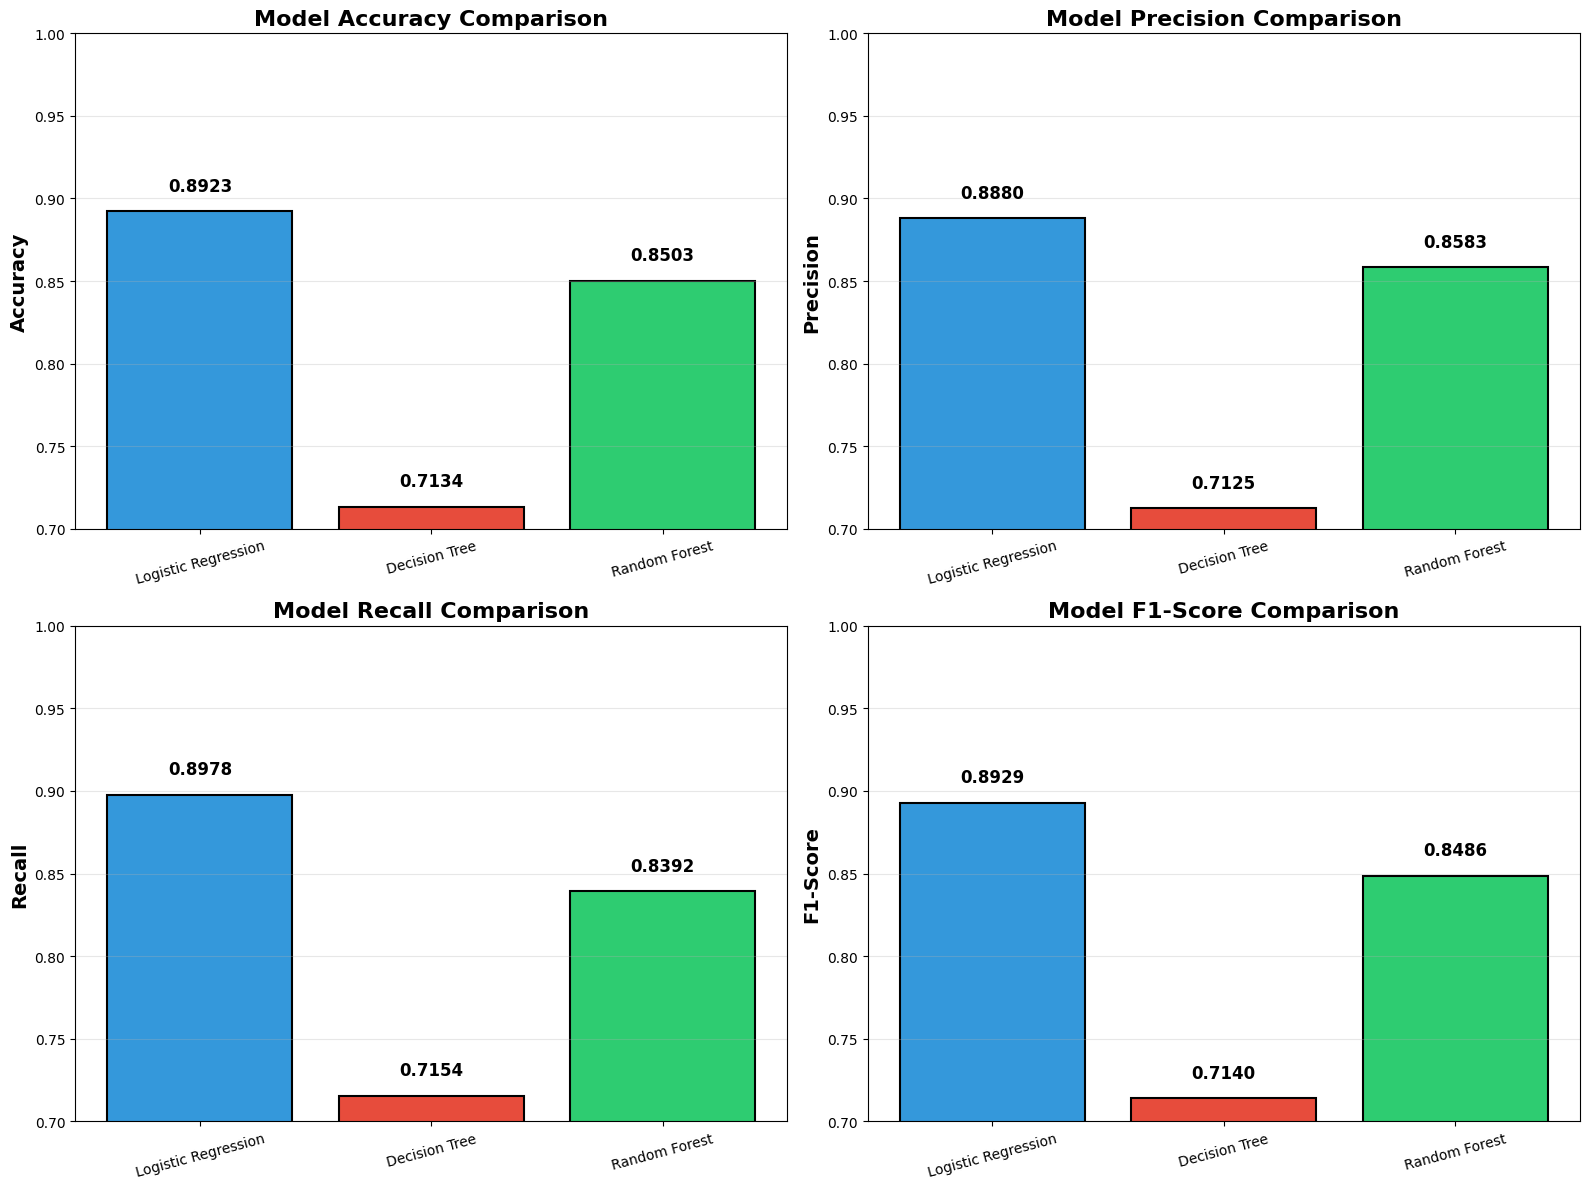

In [10]:
print("="*70)
print("BAR CHARTS OF MODEL PERFORMANCE METRICS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = results_df['Model']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Plot 1: Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(models, results_df['Accuracy'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
ax1.set_ylim([0.7, 1.0])
ax1.grid(axis='y', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars1, results_df['Accuracy'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=15)

# Plot 2: Precision
ax2 = axes[0, 1]
bars2 = ax2.bar(models, results_df['Precision'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Precision', fontsize=14, fontweight='bold')
ax2.set_title('Model Precision Comparison', fontsize=16, fontweight='bold')
ax2.set_ylim([0.7, 1.0])
ax2.grid(axis='y', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars2, results_df['Precision'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=15)

# Plot 3: Recall
ax3 = axes[1, 0]
bars3 = ax3.bar(models, results_df['Recall'], color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Recall', fontsize=14, fontweight='bold')
ax3.set_title('Model Recall Comparison', fontsize=16, fontweight='bold')
ax3.set_ylim([0.7, 1.0])
ax3.grid(axis='y', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars3, results_df['Recall'])):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=15)

# Plot 4: F1-Score
ax4 = axes[1, 1]
bars4 = ax4.bar(models, results_df['F1-Score'], color=colors, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('F1-Score', fontsize=14, fontweight='bold')
ax4.set_title('Model F1-Score Comparison', fontsize=16, fontweight='bold')
ax4.set_ylim([0.7, 1.0])
ax4.grid(axis='y', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars4, results_df['F1-Score'])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/model_performance_bar_charts.png', dpi=300, bbox_inches='tight')
print("✓ Bar charts saved to Google Drive")
plt.show()


CELL 9: Confusion Matrix for Every Baseline Model

CONFUSION MATRICES FOR ALL BASELINE MODELS
✓ Confusion matrices saved to Google Drive


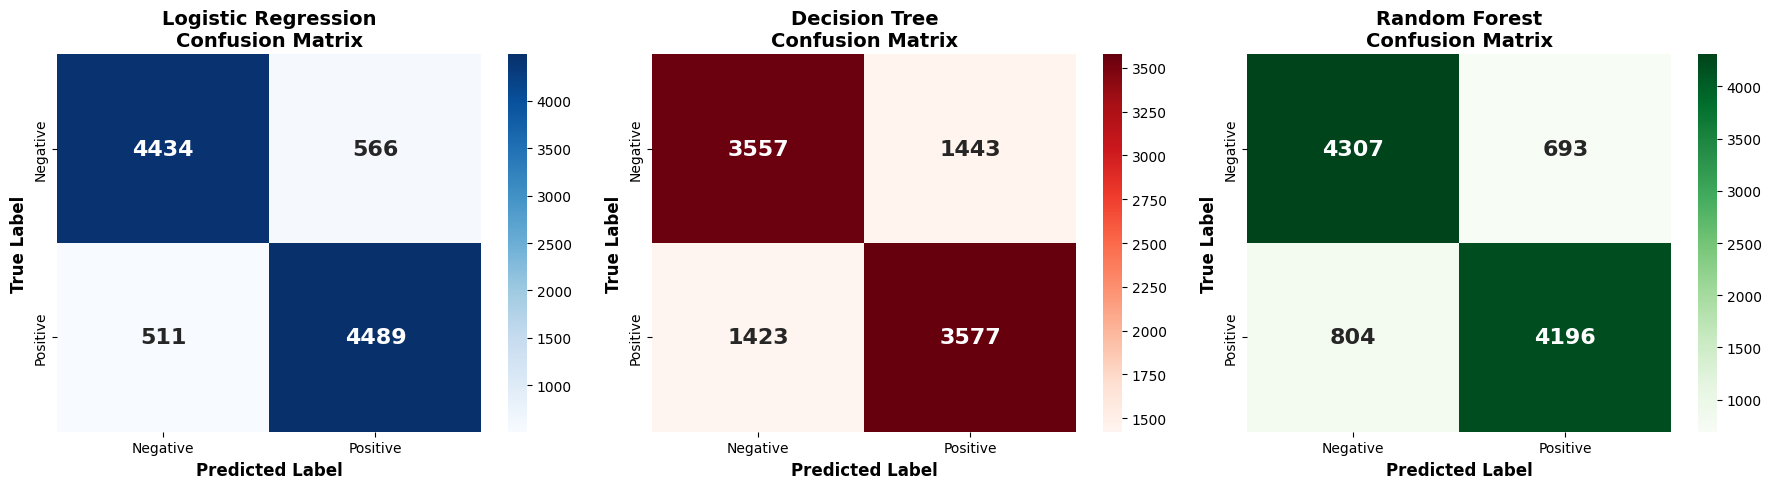


DETAILED METRICS FROM CONFUSION MATRICES

Logistic Regression:
  True Negatives:  4434
  False Positives: 566
  False Negatives: 511
  True Positives:  4489
  Total Correct:   8923 / 10000

Decision Tree:
  True Negatives:  3557
  False Positives: 1443
  False Negatives: 1423
  True Positives:  3577
  Total Correct:   7134 / 10000

Random Forest:
  True Negatives:  4307
  False Positives: 693
  False Negatives: 804
  True Positives:  4196
  Total Correct:   8503 / 10000


In [11]:
print("="*70)
print("CONFUSION MATRICES FOR ALL BASELINE MODELS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix 1: Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
ax1 = axes[0]
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax1.set_title('Logistic Regression\nConfusion Matrix', fontsize=14, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Confusion Matrix 2: Decision Tree
cm_dt = confusion_matrix(y_test, dt_pred)
ax2 = axes[1]
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=ax2, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax2.set_title('Decision Tree\nConfusion Matrix', fontsize=14, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Confusion Matrix 3: Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
ax3 = axes[2]
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax3, cbar=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 16, 'weight': 'bold'})
ax3.set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
ax3.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax3.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/confusion_matrices_baseline.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrices saved to Google Drive")
plt.show()

# Print classification metrics for each model
print("\n" + "="*70)
print("DETAILED METRICS FROM CONFUSION MATRICES")
print("="*70)

for model_name, cm, pred in [('Logistic Regression', cm_lr, lr_pred),
                               ('Decision Tree', cm_dt, dt_pred),
                               ('Random Forest', cm_rf, rf_pred)]:
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{model_name}:")
    print(f"  True Negatives:  {tn}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  True Positives:  {tp}")
    print(f"  Total Correct:   {tn + tp} / {len(y_test)}")


CELL 10: Test on Custom Reviews

In [12]:
def predict_sentiment(review_text, model, vectorizer):
    cleaned_review = clean_text(review_text)
    vectorized = vectorizer.transform([cleaned_review])
    prediction = model.predict(vectorized)[0]

    try:
        probability = model.predict_proba(vectorized)[0]
        confidence = max(probability) * 100
    except:
        confidence = 100

    sentiment = "POSITIVE" if prediction == 1 else "NEGATIVE"

    return sentiment, confidence

if best_model_idx == 0:
    best_trained_model = lr_model
    model_name = "Logistic Regression"
elif best_model_idx == 1:
    best_trained_model = dt_model
    model_name = "Decision Tree"
else:
    best_trained_model = rf_model
    model_name = "Random Forest"

print("="*70)
print("TEST ON CUSTOM REVIEWS")
print(f"Using Best Model: {model_name}")
print("="*70)

test_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Horrible movie. Waste of time and money. Very disappointed.",
    "It was okay, nothing special but entertaining enough.",
    "Best film I've ever seen! Masterpiece!",
    "Boring and predictable. I fell asleep halfway through."
]

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence = predict_sentiment(review, best_trained_model, vectorizer)
    print(f"\nReview {i}:")
    print(f"Text: {review}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.2f}%)")

print("\n✓ All tests completed!")


TEST ON CUSTOM REVIEWS
Using Best Model: Logistic Regression

Review 1:
Text: This movie was absolutely fantastic! I loved every minute of it.
Prediction: POSITIVE (Confidence: 95.56%)

Review 2:
Text: Horrible movie. Waste of time and money. Very disappointed.
Prediction: NEGATIVE (Confidence: 99.95%)

Review 3:
Text: It was okay, nothing special but entertaining enough.
Prediction: NEGATIVE (Confidence: 86.76%)

Review 4:
Text: Best film I've ever seen! Masterpiece!
Prediction: POSITIVE (Confidence: 98.96%)

Review 5:
Text: Boring and predictable. I fell asleep halfway through.
Prediction: NEGATIVE (Confidence: 99.27%)

✓ All tests completed!
